<a href="https://colab.research.google.com/github/jwlee95/DSP_Class2025/blob/main/Ch02_%EC%9D%B4%EC%82%B0_%EC%8B%A0%ED%98%B8%EC%99%80_%EC%8B%9C%EC%8A%A4%ED%85%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `CHAPTER 02`: 이산 신호와 시스템  ( `Discrete Signal and System` )

## 2.1 이산 신호 (`Discrete Signal`)의 정의  

- 이산 신호  
  - 관심의 대상이 되는 값(숫자)들을 순서대로 늘어놓은 수열   
  (예) $\{… 0.9, −0.2, 1.0, 2.1, 0.5, −1.3, 2.8 … \}$
       
      → $ x[-2]=0.9, x[-1]=-0.2, x[0]=1.0, x[1]=2.1, x[2]=0.5, … $   
  - 이산 신호의 샘플 : $x[0], x[1], … $   
  - 연속 신호의 샘플링에 의한 이산 신호  $ x[n] = x(t) |_{t=nT} = x(nT), n= \dots , -2,-1,0,1,2,\dots $  


<center>
<img src='https://drive.google.com/uc?export=download&id=1Kr_hBIyaZeQKWgBx_-Dm6lDWIoraDksc' width="600" height ="" /><br>

---

#### 유한 구간 및 무한 구간 이산 신호   

- 이산 신호의 길이  
  - 신호를 이루는 샘플의 개수 $N$  
  $x[n]=0, n \lt N_1 , n \gt N_2  \rightarrow N = N_2 - N_1 + 1$

- 유한 구간 이산 신호  
  - 유한한 개수의 샘플로 이루어진 이산 신호 ([그림 2-1(a)])  
  - 유한한 구간 내에서만 신호 값이 존재   

- 무한 구간 이산 신호
  - 무한개의 샘플로 이루어진 신호 ([그림 2-1(b)])



---

### 2.1.1 이산 신호의 분류  

- 에너지 신호 (`Energy Signal`) : 에너지가 유한한 신호  
$$ E = \lim_{ N \rightarrow \infty} \sum_{n=-N}^{N} |x[n]|^2  ,
   \lt \infty \;\; x[n]=n, n\ge 0
$$
  - 전력이 0이므로 전력 신호보다 더 엄격한 조건을 충족시키는 신호  
  - 유한 크기 샘플들로 이루어진 유한 구간 이산 신호는 에너지 신호임  
  - 무한 구간 이산 신호 중에도 에너지 신호 많이 있음  

- 전력 신호 (`Power Signal`): 전력이 유한한 신호   
$$ P = \lim_{ N \rightarrow \infty} \frac{1}{2N+1} \sum_{n=-N}^{N} |x[n]|^2  \lt \infty ,
    \;\; x[n]=n, n\ge 0
$$  
  - 무한 에너지 갖는 대부분의 신호들은 전력 신호   


> * 에너지 신호도 전력 신호도 아닌 신호  
  ex] 램프 신호(ramp signal) : $\;  x[n]=n, n\ge 0$  


  <img src='https://drive.google.com/uc?export=download&id=1KtUsfx6Lk7eKGbjw41KKe3SADpGtveDz' width="600" height ="" /><br>



- 에너지 신호와 전력 신호의 비교

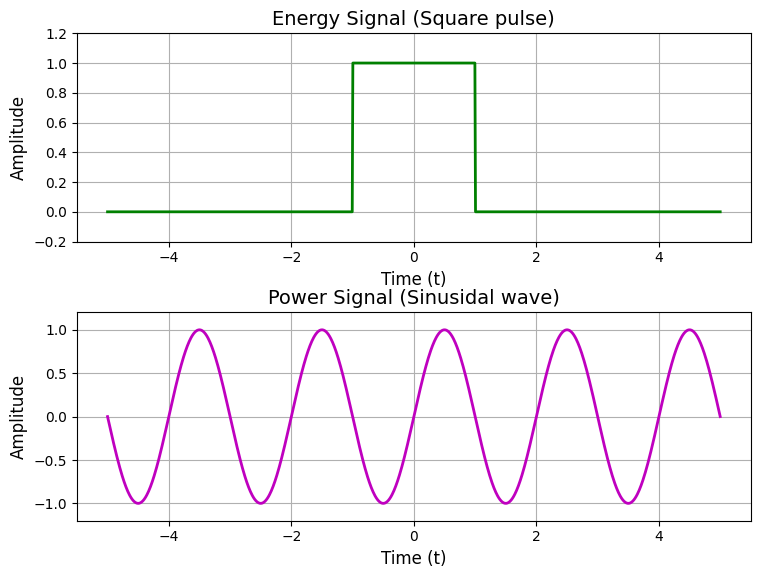

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 에너지 신호 (사각 펄스) 그리기
t_energy = np.linspace(-5, 5, 1000) # 시간 축
energy_signal = np.where((t_energy >= -1) & (t_energy <= 1), 1, 0) # -1에서 1 사이는 1, 그 외는 0

# 2. 전력 신호 (사인파) 그리기
t_power = np.linspace(-5, 5, 1000) # 시간 축
power_signal = np.sin(2 * np.pi * 0.5 * t_power) # 주파수 0.5Hz 사인파

# 3. 그래프 출력
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
fig.tight_layout(pad=3.0)

# 에너지 신호 플롯
ax1.plot(t_energy, energy_signal, 'g', linewidth=2)
ax1.set_title('Energy Signal (Square pulse)', fontsize=14)
ax1.set_xlabel('Time (t)', fontsize=12)
ax1.set_ylabel('Amplitude', fontsize=12)
ax1.grid(True)
ax1.set_ylim([-0.2, 1.2])

# 전력 신호 플롯
ax2.plot(t_power, power_signal, 'm', linewidth=2)
ax2.set_title('Power Signal (Sinusidal wave)', fontsize=14)
ax2.set_xlabel('Time (t)', fontsize=12)
ax2.set_ylabel('Amplitude', fontsize=12)
ax2.grid(True)
ax2.set_ylim([-1.2, 1.2])

plt.show()

- **주기 신호 (`Periodic Signal`)** : 파형이 계속해서 일정하게 반복되는 신호  
$$ \;  x[n + kN ] = x[n], \;\;\; k = \dots,-1,0,1,2,\dots  $$
  - 일반적으로 전력 신호 $\Rightarrow$ **한 주기 에너지는 유한, 총 에너지는 무한 **

- **확정 신호 (`Deterministic Signal`)** : 시간에 대해 정해진 형태를 갖는 신호  
  - 수식이나 표 또는 다른 규칙에 의해 명확하게 표현될 수 있는 신호  
   (예) 계단 신호, 정현파, 클럭 펄스 등

- **불규칙 신호 (`Random Signal`)**  
  : 신호의 값을 예측할 수는 없지만 일정한 통계적 특성을 가지는 신호  
   (예) 동전이나 주사위 이어 던지기, 반도체 열 잡음, 통신 잡음 등

---   
### 2.1.2 기본 이산 신호


#### 이산 (단위) 임펄스 신호 (`Discrete(Unit) Impulse Signal`)   

- **이산(단위) 임펄스 신호** $ \delta [n]$   
  - 단위 샘플 신호 또는 "**크로네커 델타** `Kronecker delta` " 라고도 함  
$$  \delta [n] = \left\{\begin{matrix}
 1, \;\; n=0 \\
 0  \;\; n \ne 0
\end{matrix}\right.
$$

  - 이산 신호는 임펄스 신호의 가중합 형태로 나타낼 수 있음  
$$
\begin{align}
	x[n]&= \dots + x[-1] \delta[n+1] + x[0] \delta[n] + \dots + x[k] \delta[n-k]+ \dots \\
    	&= \sum_{k = - \infty}^{ \infty} x[k] \delta[n-k]
\end{align}
$$

> $\Rightarrow $ ***임펄스 함수의 체 거르기(`sifting`) 또는 샘플링 성질  
 신호값 중에서 특정 시각$(n)$의 신호 값$(x[𝑛])$만 취하는 것으로 해석***

- **연속시간 신호**에 해당하는 함수는 **디랙 델타 함수(Dirac delta function)**.  
  디랙 델타 함수는 연속적인 신호에서의 단위 임펄스를 나타내며, 다음과 같이 정의된다:

  디랙 델타 함수 (Dirac Delta Function)  
    - 디랙 델타 함수 $\delta(t)$는 다음과 같이 정의됩니다:

$$
\delta(t) =
\begin{cases}
\infty & \text{if } t = 0 \\
0 & \text{if } t \neq 0
\end{cases}
$$

  그리고 다음과 같은 중요한 성질을 가집니다:

$$
\int_{-\infty}^{\infty} \delta(t) \, dt = 1
$$


  - 크로네커 델타 함수와 디랙 델타 함수의 차이

| 특성          | 크로네커 델타 함수 ($\delta[n]$) | 디랙 델타 함수 ($\delta(t)$)                  |
| ------------- | ------------------------------------------- | ----------------------------------------------- |
| **정의 영역** | 이산 신호 (정수 $n$에 대해 정의됨)            | 연속 신호 (실수 $t$에 대해 정의됨)                |
| **값**        | 0 또는 1                                    | 0 또는 무한대 (단위 면적을 갖는 임펄스)         |
| **적분**      | $\sum_{n=-\infty}^{\infty} \delta[n] = 1$ | $\int_{-\infty}^{\infty} \delta(t) \, dt = 1$ |
| **응용**      | 이산 시스템의 분석 및 신호 표현에 사용      | 연속 시스템의 분석 및 신호 표현에 사용          |
| **컨볼루션**  | $x[n] * \delta[n] = x[n]$ | $x(t) * \delta(t) = x(t)$|

  - **크로네커 델타 함수**는 이산 신호에서 단위 임펄스를 나타내며, 정수 인덱스에 대해 정의.  
  - **디랙 델타 함수**는 연속 신호에서 단위 임펄스를 나타내며, 실수 시간에 대해 정의.  

이 두 함수는 각각 이산 신호 처리와 연속 신호 처리에서 중요한 역할을 하며, 신호의 특성을 분석하고 표현하는 데 필요한 기본 도구이다.

---
#### 이산(단위) 계단 신호 (`Discrete(Unit) Step Signal`)   

- **이산(단위) 계단 신호** $ u[n]$   
  - $ n \gt 0$에서 값이 일정(=1) -> "직류 신호"  
$$  u[n] = \left\{\begin{matrix}
 1, \;\; n= \gt 0 \\
 0  \;\; n \lt 0
\end{matrix}\right.
$$

  - 다른 신호에 대한 on-off 스위치 역할  $\Rightarrow$ ***신호의 표현에 이용***
  - $ \delta [n]$과 $ u[n]$의 관계   
$$
\delta [n] = u[n] - u[n-1] \\
u[n] = \sum_{k=- \infty}^{\infty} \delta[k]
$$

<center>
 <img src='https://drive.google.com/uc?export=download&id=1KvOiOsUV8EJKsssOx81_Xe8VAObWEuqC' width="600" height ="" /><br>


 <img src='https://drive.google.com/uc?export=download&id=1KvzGl495c3Jo9s-ba_IZHGMqdnz-fUEs' width="700" height ="" /><br>

---
#### 이산 지수 신호 (`Discrete Expoential Signal`)   

- 지수 신호  
  - 밑수 $a$ 가 실수인 경우와 복소수인 경우로 구분  
$  x[n] = a^n  $  

  - 실수 지수 함수 : $a \lt 0$이면 샘플값의 부호가 번갈아 가면서 바뀜  

<center>
<img src='https://drive.google.com/uc?export=download&id=1KxhN7yMhBdN4urtnbvZGbWDTsMf3IlWv' width="700" height ="" /><br>   



  - 이산 복소 지수 함수(`Discrete Complex Exponetial Function`) : 진폭이 지수적으로 증가/감소하면서 정현적으로 진동

$$
\begin{align}
	x[n]&= \left(r e^{j \Omega_0} \right)^n  = r^n e^{j \Omega_0 n}\\
    	&= r^n [ \cos (\Omega_0 n) + j \sin(\Omega_0 n)]
\end{align}
$$  

<center>
<img src='https://drive.google.com/uc?export=download&id=1KxqvEnMU7eXzctfNp4agKwqCL-CX6dto' width="800" height ="" /><br>


---
#### 이산 (복소) 정현파 신호(`Discrete (Complex) Sinusoidal signal`)  

- 복소 정현파 신호 : 복소 지수 함수에서 $|a|=r=1$인 경우
$$ x[n] = e^{j \Omega_0 n} = \cos(\Omega_0 n) + j \sin(\Omega_0 n) $$   
  - 실수 정현파는 복소 정현파로부터 실수부나 허수부를 취하여 표현   
  - 이산 정현파의 주기성 : **디지털 주파수가 유리수(`rational number`)가 되어야만 주기 신호**
$$ \frac{\Omega_0}{2\pi} = F_0 = \frac{k}{N}, \;\;\; k,N\text{은 정수} $$
  - **$2\pi$의 정수배만큼 떨어진 주파수를 갖는 신호들은 구분되지 않음**
$$ e^{j(\Omega_0 + 2\pi k)n} = e^{j \Omega_0 n} e^{j2\pi kn} = e^{j\Omega_0 n} $$



- 오일러 공식(`Euler formular`)$$ \cos(\Omega_0 n) = \frac{e^{j\Omega_0 n} + e^{-j\Omega_0 n}}{2} \\
\sin(\Omega_0 n) = \frac{e^{j\Omega_0 n} - e^{-j\Omega_0 n}}{j2}$$
---

`Note: 유한 등비급수(finite geometric series)`   

$$
S_N = a_0 \sum_{n=0}^{N} r^n
$$
여기서 r은 **공비**(`共比, common ratio`)이다.
$$
\begin{align}
S_N &= a_0 ( 1 + r + r^2 + r^3 + \cdots r^N )  \\
rS_N &= a_0 ( r + r^2 + r^3 + r^4 \cdots r^N + r^{N+1} )  \\  
S_N - rS_N &= a_0 ( 1-r^{N+1}) \Rightarrow S_N = \frac{a_0 ( 1-r^{N+1})}{1-r}
\end{align}
$$

---  


## 2.2 이산 신호에 대한 기본 연산   


- 신호는 크기(진폭)를 갖는 시간의 함수   
  → ***시간과 진폭에 대한  연산이 기본***
- 복잡한 신호도  단순한 신호에 기본  연산의 조합을 수행해  표현할 수 있음  


<center>
<img src='https://drive.google.com/uc?export=download&id=1KzEJ5JJFhN7smn_tEgP_C8tEJLFBfShn' width="600\" height ="" /><br>

### 2.2.1 연속 신호와 동일한 연산

<center>
<img src='https://drive.google.com/uc?export=download&id=1KzefaXHKzqYkTMf80BnNX-p9fmDM4jDK' width="800" height ="" /><br>   


<img src='https://drive.google.com/uc?export=download&id=1L2c07pUKWrtrw2phQ_RhFNEohls_XEfj' width="800" height ="" /><br>  



---  
### 2.2.2 연속 신호와 다른 연산

#### 이산신호의 차분과 누적합   

- 시간에 대한 미분과 적분이 정의되지 않고 미분과 적분을 근사화하여 등가 연산이라 할 수 있는 차분(Difference)과 누적합이 정의됨   
  - 차분: 하나 뒤진(앞선) 시간의 신호 값과의 차이로 미분을 근사화   
  $$y[n] = \Delta x[n] = x[n] - x[n-1]$$
  - 누적합: 들어온 신호 값들을 연속적으로 더하는 방법으로 적분을 근사화  
  $$y[n] = \sum_{k=-\infty}^{\infty} x[k]$$

#### 이산 신호의 시간 척도 조절  

- 시간 척도 변화 - 솎음과 보간  
$$  y[n] = x[an] $$  
- **솎음 (`Decimation`)**
  - 시간축 압축(`compression`)에 해당($a \gt 1 $인 정수)  
  - 샘플 중 $a$의 배수($an$) 시간의 샘플만 남기고 나머지는 버리는 동작  
  - 신호 샘플(데이터 또는 정보)에 대한 소실 발생  
   (예) [그림 2-11(b)]  
      $a=2 \rightarrow$ 하나씩 건너뛰며 $x[1], x[3], x[5], \dots$ 신호 샘플을 솎아냄  
      $y[0] = x[0], \; y[1] = x[2], \; y[2] = x[4], \dots $  

- **보간 (`Interpolation`)**
  - 시간축 늘이기(`stretching`)에 해당 ($a \lt 1, \; \frac{1}{a}$은 반드시 정수)  
  - 원 신호 샘플 사이에 새로운 샘플을 끼워 넣는 동작  
  - 끼워 넣어야할 샘플에 대한 정보 없음  
   → ***신호를 크게 왜곡하지 않는 범위 내에서 적당한 값을 선택***  
   → ***0을 끼워 넣거나 앞뒤 샘플의 평균으로 대체하는 것이 일반적임***   

   (예) [그림 2-11(c), (d)]  
      $a= \frac{1}{2} \rightarrow$ 원 신호 샘플 $x[1], x[2], x[3], \dots$ 사이에 샘플을 끼워 넣음  
      $y[0] = x[0], \; y[2] = x[1], \; y[4] = x[2], \dots $   

<center>
<img src='https://drive.google.com/uc?export=download&id=1L37Nfa2-IONgCBzMuHq4vHpcHzMR2fbP' width="700" height ="" /><br>


<img src='https://drive.google.com/uc?export=download&id=1L40M3LFnRZas6U0zt9XsEB9hZe2rl7RZ' width="700" height ="" /><br>

---   
### 2.2.3 연산의 조합에 의한 이산 신호의 표현

---  
## 2.3 이산 시스템(`Discrete System`)

### 이산 시스템  

- 이산 시스템  
  - 이산 신호(입력)를 받아들여 다른 이산 신호(출력)를 만들어내는 장치  
  - 이산 시스템 표현  
  → 블록선도를 이용 시스템 구성을 시각적으로 묘사  
  → 시스템 동작 규칙을 정형화하여 수식으로 표현  

- 이산 시스템의 차분 방정식(`Difference equation`) 표현  
$$ y[n] + a_1 y[n-1] + \dots + a_p y[n-p] = b_0 x[n] + \dots + b_q x[n-q]$$


- 차분 방정식으로 표현된 이산 시스템의 블록 선도  
  - 시간 지연기, 곱셈기, 덧셈기로 이산 시스템을 구성할 수 있음  
  ▶ **시간 지연기** : 입력 신호를 한 스텝 지연시키는 요소 $y[n]=x[n-1]$  
  ▶ **곱셈기** : 신호에 상수 값을 곱하는 요소 $y[n]=a x[n]$  
  ▶ **덧셈기** : 신호를 더해 다른 신호를 만드는 요소 $y[n]=x_1 [n] + x_2 [n]$

<center>
<img src='https://drive.google.com/uc?export=download&id=1L4tfypn0h3LhXsevUjbmdH_21DeJ37op' width="700" height ="" /><br>

---
- 차분 방정식으로 표현된 이산 시스템의 블록 선도  
  - 기본적으로 '탭-지연기열'(`tapped delay line`) 구조를 이루고 있음  
  - 출력을 형성하는 항들의 형태에 따라 3가지 경우로 구분 가능  

  ▶**이동평균(MA: Moving Average) 모델** : 출력이 입력 신호의 이동 평균
$$ y[n] = b_0 x[n] + b_1 x[n-1] + \dots + b_q x[n-q]$$
  ▶**자기 회귀(AR: Auto Regressive) 모델** : 출력이 과거 출력 신호의 자기 회귀항  
$$ y[n] = -a_0 y[n] - \dots - a_p y[n-p] + x[n]$$
  ▶**자기 회귀 이동 평균(ARMA) 모델** : AR + MA
$$ y[n] + a_1 y[n-1] + \dots + a_p y[n-p] = b_0 x[n] + b_1 x[n-1] + \dots + b_q x[n-q]$$  

<center>
<img src='https://drive.google.com/uc?export=download&id=1L7aMXW4Wxb-LE5IiWT7m26BMOJof_7dD' width="800" height ="" /><br>


---
<img src='https://drive.google.com/uc?export=download&id=1LCB7lMZRHMM3x8M0nuurp6xyVLmAsqEd' width="700" height ="" /><br>

<img src='https://drive.google.com/uc?export=download&id=1LBHnjf1RtQIAg21iZ4flroaS3pW6Ihj0' width="700" height ="" /><br>

---  
## 2.4 이산 시스템의 분류  

### 2.4.1 선형 시스템과 비선형 시스템   

- **선형 시스템 (`Linear System`)** : 입출력 관계가 선형으로 주어지는 시스템  
  - `선형성 (Linearity)(=중첩의 원리) : 가산성(additivity) + 동차성(homogeneity)`  
$$ H\{ \alpha x_1 + \beta x_2 \} = \alpha H\{ x_1 \} + \beta H\{ x_2 \} = \alpha y_1 + \beta y_2$$
- **비선형 시스템 (`Nonlinear System`)** : 선형성을 불만족하는 시스템   


<center>
<img src='https://drive.google.com/uc?export=download&id=1LCRWlBa2oqtYJt0abS1Hn5vxtTMXjWT_' width="500" height ="" /><br>

<img src='https://drive.google.com/uc?export=download&id=1LE0jLia4giBugJwAVCXDTxG2UzJTpejW' width="700" height ="" /><br>

---
### 2.4.2 시불변 시스템과 시변 시스템   

- **시불변 시스템 (`Time-invariant System`)**
: 시간에 상관없이 같은 입력에 대해 항상 같은 반응을 보이는 시스템
$$ H\{ x[n] \} = y[n] \text{일 때, }H\{ x[n - n_0] \} = y[n-n_0] $$
  - 시스템 특성(파라미터)이 시간에 따라 불변  
  - 차분 방정식의 계수가 상수 계수  

- **시변 시스템 (`Time-variant System`)**  
: 입력이 들어오는 시간에 따라 출력이 달라지는 시스템

  - 시스템 특성(파라미터)이 시간에 따라 변함  
  - 차분 방정식의 계수가 시간 함수

<center>
<img src='https://drive.google.com/uc?export=download&id=1LGGecSpv2uG39XYdY42d81Mrg99dgy_C' width="600" height ="" /><br>

---  
### 2.4.3 인과 시스템과 비인과 시스템  

- **인과 시스템 (`Causal System`)** : 인과성을 만족하는 시스템  
  - 인과성(causality) : 미래의 입력이 현재의 출력에는 영향을 주지 못함. 즉 $ n_0 $ 에서의 출력이 에서의 입력에만 의존
$$  x[n]=0, n \le n_0 \text{일 때, },\;\; y[n] = 0, n \le n_0  $$

- **비인과 시스템 (`Non-causal System`)** : 인과성을 불만족

<center>
 <img src='https://drive.google.com/uc?export=download&id=1LGwXGS2F9pfCwzxzvwSCKzBAjIBoj4gE' width="600" height ="" /><br>


---
### 2.4.4 안정 시스템과 불안정 시스템

- **BIBO(Bounded-Input Bounded-Output) 안정도**  
  입력 크기가 유한하면 출력의 크기도 반드시 유한하게 보장되는 성질
$$ | x[n]| \le M_x \lt \infty \text{ 일 때}, \;\; | y[n]| \le M_y \lt \infty $$

- **안정 시스템 (`Stable System`)**
: 유한한 크기의 입력에 대해 유한한 크기의 출력이 나오는 시스템  
  - 물리적으로 시스템의 지속적 작동이 보장됨

- **불안정 시스템  (`Unstable System`)**
: 유한한 크기의 입력에 대해 무한한 크기의 출력이 나오는 시스템  
  - 궁극적으로 시스템은 파괴됨

<center>
<img src='https://drive.google.com/uc?export=download&id=1LH7DttLdd-T9DfmLeE0vZ29AG2SEp7f8' width="600" height ="" /><br>

---
### 2.4.5 동적(기억) 시스템과 순시적(무기억) 시스템  

- **동적(기억) 시스템 (`Dynamic System`)**
  - 출력이 현재 입력 외에 과거의 입력에도 영향 받음 : 기억 기능 보유  
  - 입출력 관계가 차분 방정식의 형태    
   (예) 적분기, L 또는 C 회로, 순차 논리 회로 등

- **순시적(무기억) 시스템 (`Instantaneous System`)**
  - 출력이 현재의 입력만으로 결정
  - 입출력 관계가 대수 방정식으로 표현     
  (예) R 회로, 조합 논리 회로 등


 <img src='https://drive.google.com/uc?export=download&id=1LHqhTOVoZDW5GE34YA-wr3CTRK4M5OEd' width="700" height ="" /><br>

---  
## Q&A